# Identifying trends in consumers’ usage of health-focused smart devices

# Introduction
This case study is a capstone project for the Google Data Analytics Professional Certificate. The project follows the data analysis process: ask, prepare, process, analyze, share, and act.

# Scenario
Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. 

# Ask
In this notebook, we analyze how consumers use non-Bellabeat smart devices. Then, we select one Bellabeat product to apply these insights to. We will try to answer the following questions:

1.  What are some trends in smart device usage?
2.  How could these trends apply to Bellabeat customers?
3.  How could these trends help influence Bellabeat marketing strategy?

# Business task
Analyze smart fitness data to unlock new growth opportunities for the company. 

# Prepare
**About the data**

This dataset is generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. The [dataset](https://www.kaggle.com/datasets/arashnic/fitbit) can be found on Kaggle.

Licensing: The FitBit Fitness Tracker Data is released under the Creative Commons Zero (CC0) license which means it has been dedicated to the public domain and is completely free to use without any restrictions.

Privacy and Security: The data is safe since the users consented to the submission of their data and all of it is anonymized, so that their personal information cannot be identified.

**Data organization**
The dataset consists of 18 CSV files. 3 tables are represented in wide format and 15 tables are in long format. Each table has an ID column as a primary key.

# Process

In [1]:
# Loading packages and libraries
install.packages("tidyverse")
install.packages("ggforce")
install.packages("data.table")
library(tidyverse)
library(data.table)
library(dplyr)
library(ggplot2)
library(ggforce)
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package

In [2]:
# Renaming and importing 18 CSV files
ActivityDaily <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
CaloriesDaily <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
CaloriesHourly <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
CaloriesMinuteNarrow <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
CaloriesMinuteWide <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv")
HeartRateSeconds <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
IntensitiesDaily <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
IntensitiesHourly <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
IntensitiesMinuteNarrow <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
IntensitiesMinuteWide <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv")
METsMinuteNarrow <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
SleepDay <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
SleepMinute <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
StepsDaily <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
StepsHourly <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
StepsMinuteNarrow <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
StepsMinuteWide <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv")
WeightLog <- read.csv("/kaggle/input/fitabase-data/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [3]:
ActivityDaily %>% select(c('Id', 'ActivityDate', 'Calories')) %>% head()
head(CaloriesDaily)

,Id,ActivityDate,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


A quick glance at the first few entries of some of the CSV files tell us that `ActivityDaily` is a summary of the other CSV files. A notable exception is the CSV file about sleep and another one about weight.

In [4]:
SleepDay %>% head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


We will mainly use 3 files:

1.  ActivityDaily
2.  SleepDay
3.  WeightLog

In [5]:
# Remove duplicates
sum(duplicated(distinct(ActivityDaily)))
sum(duplicated(distinct(SleepDay)))
sum(duplicated(distinct(WeightLog)))

# Handle missing values
sum(is.na(ActivityDaily))
sum(is.na(SleepDay))
sum(is.na(na.omit(WeightLog)))

# Save cleaned files
ActivityDailyCleaned <- ActivityDaily %>% distinct()
SleepDayCleaned <- SleepDay %>% distinct()
WeightLogCleaned <- WeightLog %>% distinct() %>% na.omit()

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

# Analyze
### ActivityDailyCleaned
Let us first look at the `ActivityDailyCleaned` dataset. In particular, we focus on the columns `VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes`.

In [6]:
ActivityDailyCleaned %>% select(c('VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes')) %>% summary()

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0        Min.   :   0.0  
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0        1st Qu.: 729.8  
 Median :  4.00    Median :  6.00      Median :199.0        Median :1057.5  
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8        Mean   : 991.2  
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0        3rd Qu.:1229.5  
 Max.   :210.00    Max.   :143.00      Max.   :518.0        Max.   :1440.0  

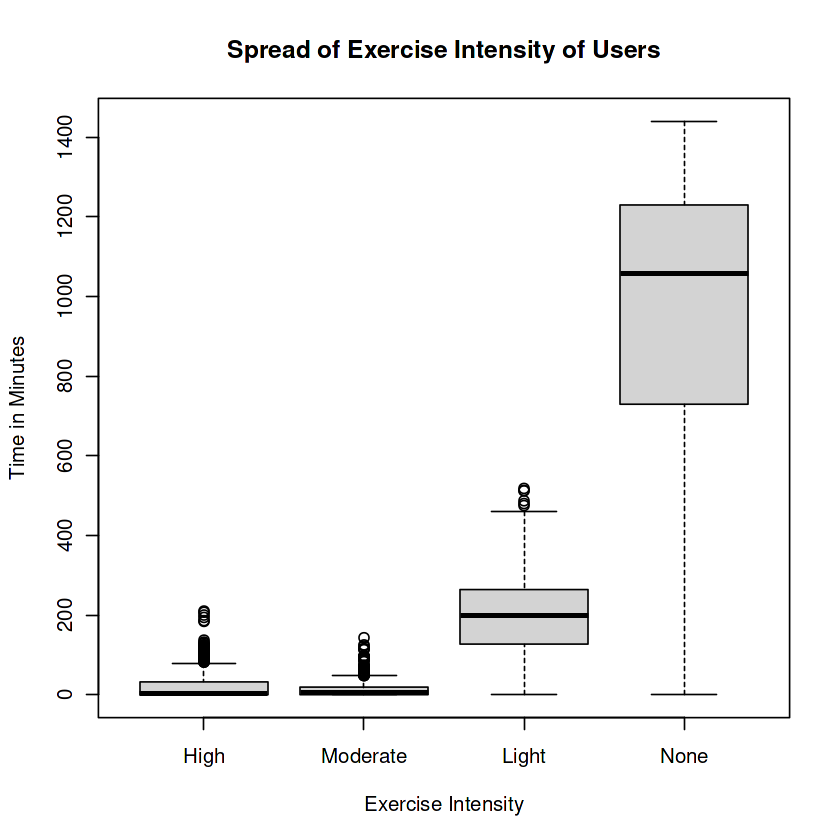

In [7]:
ActivityDailyCleaned %>% 
  select(c('VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes')) %>% 
  boxplot(main = 'Spread of Exercise Intensity of Users', 
          xlab = 'Exercise Intensity',
          ylab = 'Time in Minutes',
          names = c('High', 'Moderate', 'Light', 'None'))

The boxplot for `None` suggests that users in general spend much more time (1000 minutes, about 16 hours including sleep) not exercising, which is normal. Let's take a closer look at the comparison between the times that the users are exercising.

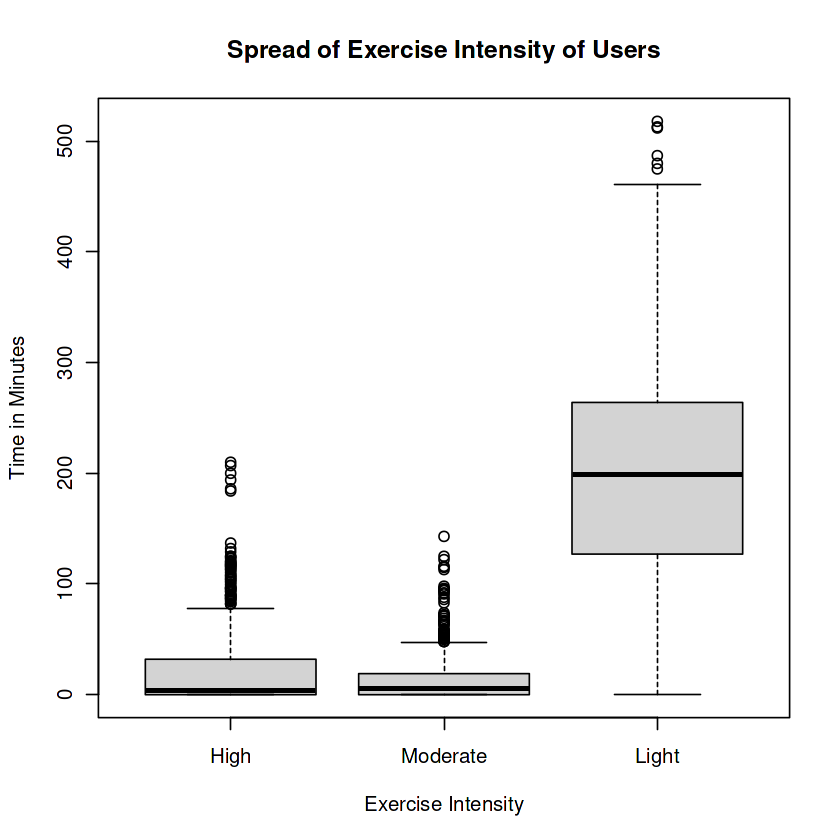

In [8]:
ActivityDailyCleaned %>% 
  select(c('VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes')) %>% 
  boxplot(main = 'Spread of Exercise Intensity of Users', 
          xlab = 'Exercise Intensity',
          ylab = 'Time in Minutes',
          names = c('High', 'Moderate', 'Light'))

We can see that the users generally spend around 200 minutes (about 3 hours, likely including walking from places to places) on light activities, whereas most rarely spend time on moderate and high intensity activities. This might suggest that users generally are not the type to allocate time for exercise regularly. 

Takeaway: We can narrow down the target audience for our marketing strategy to women who are unable to allocate time for exercise regularly.

### SleepDayCleaned
Next, let us look at `SleepDayCleaned`. We will focus on the columns `TotalMinutesAsleep, TotalTimeInBed`.


In [9]:
SleepDayCleaned %>% 
  select(c('TotalMinutesAsleep', 'TotalTimeInBed')) %>%
  summary()

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.8  
 Median :432.5      Median :463.0  
 Mean   :419.2      Mean   :458.5  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

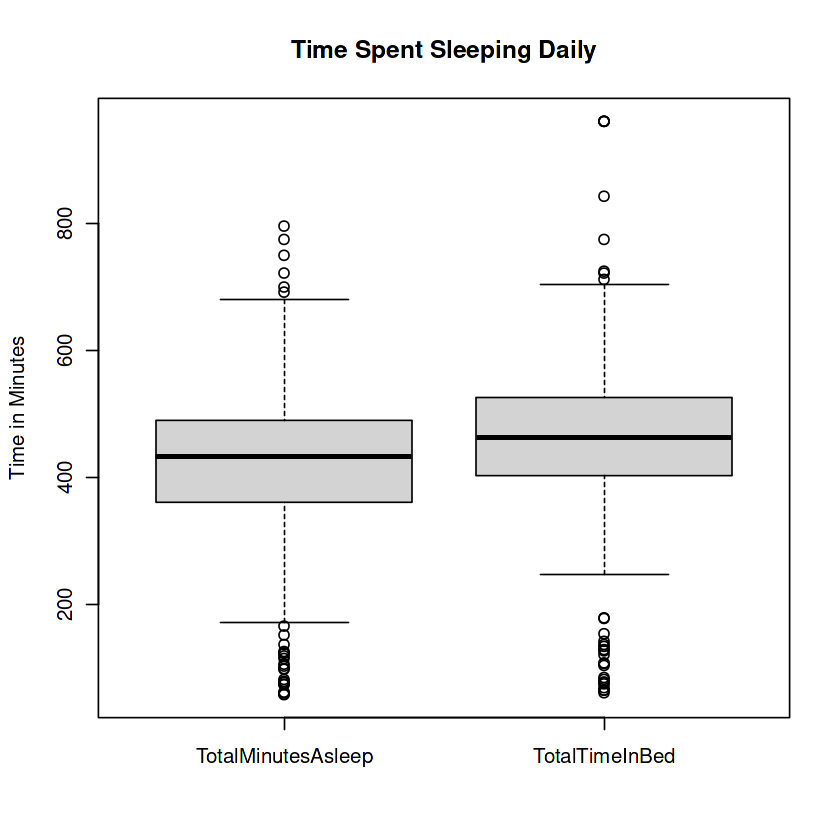

In [10]:
SleepDayCleaned %>% 
  select(c('TotalMinutesAsleep', 'TotalTimeInBed')) %>%
  boxplot(main = 'Time Spent Sleeping Daily',
          ylab = 'Time in Minutes')

The inter-quartile range states that users spend 6-8 hours sleeping, slightly less than the [recommended hours given by Harvard Medical School](https://www.health.harvard.edu/womens-health/women-and-sleep-one-simple-step-to-a-longer-healthier-life#:~:text=For%20optimum%20health%20and%20function,that%20may%20require%20medical%20attention.).

Takeaway: Our marketing strategy can include improvement of sleep quality for users.

### WeightLog
Lastly, let us look at `WeightLog`. In particular, we will look at the column `WeightKg`.

In [11]:
WeightLog %>% 
  select(c('WeightKg', 'BMI')) %>%
  summary()

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

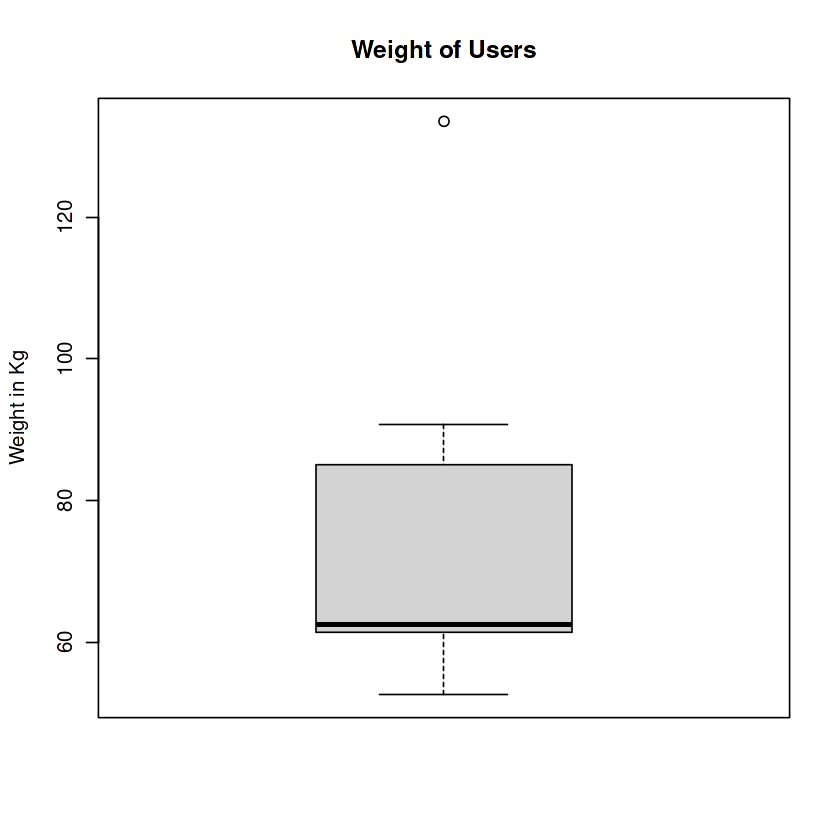

In [12]:
WeightLog %>% 
  select(c('WeightKg')) %>%
  boxplot(main = 'Weight of Users',
          ylab = 'Weight in Kg')

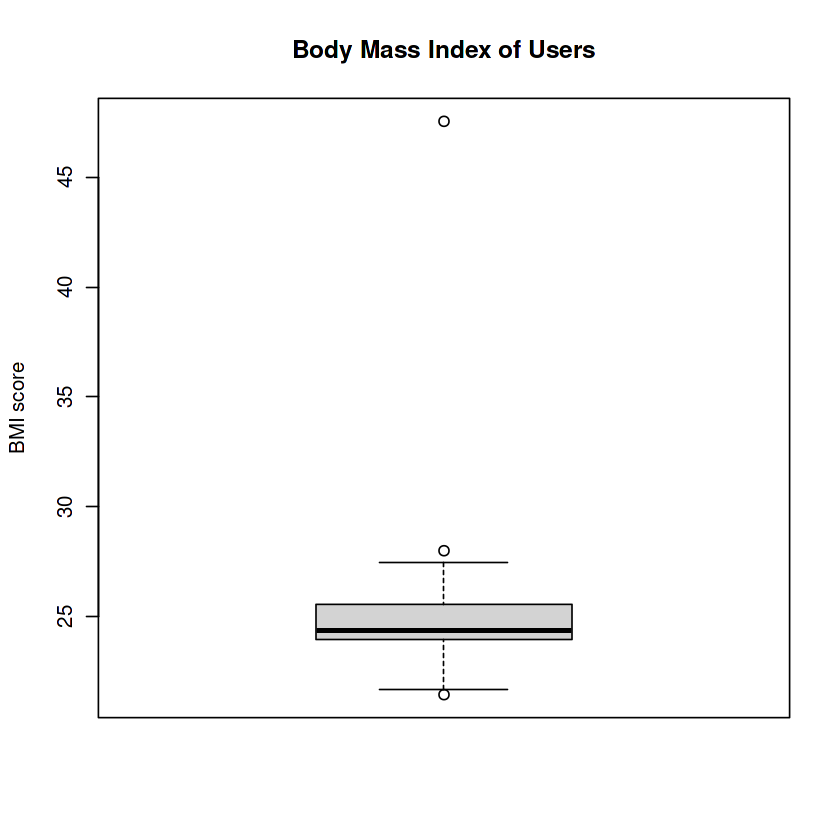

In [13]:
WeightLog %>% 
  select(c('BMI')) %>%
  boxplot(main = 'Body Mass Index of Users',
          ylab = 'BMI score')

We see that most users weigh from about 61kg to 85kg, and BMI score of 24 to 25.5, which suggests that most users have healthy weight, although some may be slightly overweight, according to the [BMI interpretation by Centers for Disease Control and Prevention](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html).

Takeaway: Our marketing strategy can include some elements of weight loss plans to provide additional support for users that are slightly overweight, to nudge them into the healthy weight range.

# Share
Thank you for reading all the way here. I will share these insights with the Bellabeat representatives via a [presentation](https://www.youtube.com/watch?v=dQw4w9WgXcQ).

# Act
Overall, we had 3 main takeaways:
1.  We can narrow down the target audience for our marketing strategy to women who are unable to allocate time for exercise regularly.
2.  Our marketing strategy can include improvement of sleep quality for users.
3.  Our marketing strategy can include some elements of weight loss plans to provide additional support for users that are slightly overweight, to nudge them into the healthy weight range.
